In [24]:
import numpy as np
from loaders import load_results
from plotters import plot_powervsvars, plot_powervscomp, plot_powervsnfeat, power_interval, plot_sizevsvars, plot_powervsvars_exactv3

## Correlated Gaussians

In [2]:
# folder containing the data to be processed
folder = 'paper/cg_ntot5000_B200_niter400'

In [3]:
config = {'dataset': 'cg', 'ntot': 5000, 'B': 200, 'niter': 400}
vars = [0.51, 0.54, 0.57, 0.6, 0.63, 0.66, 0.69]
methods = ['uniform', 'rlss', 'rff', 'ctt'] # do not include "fullrank here"

In [4]:
# do not include "fullrank here"
results = load_results(folder, methods=methods) 

loading uniform
['paper/cg_ntot5000_B200_niter400/var0.63/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.54/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.6/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.69/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.51/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.66/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.57/uniform/results.npy']
loading rlss
['paper/cg_ntot5000_B200_niter400/var0.63/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.54/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.6/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.69/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.51/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.66/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.57/rlss/results.npy']
loading rff
['paper/cg_ntot5000_B200_niter400/var0.63/rff/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.

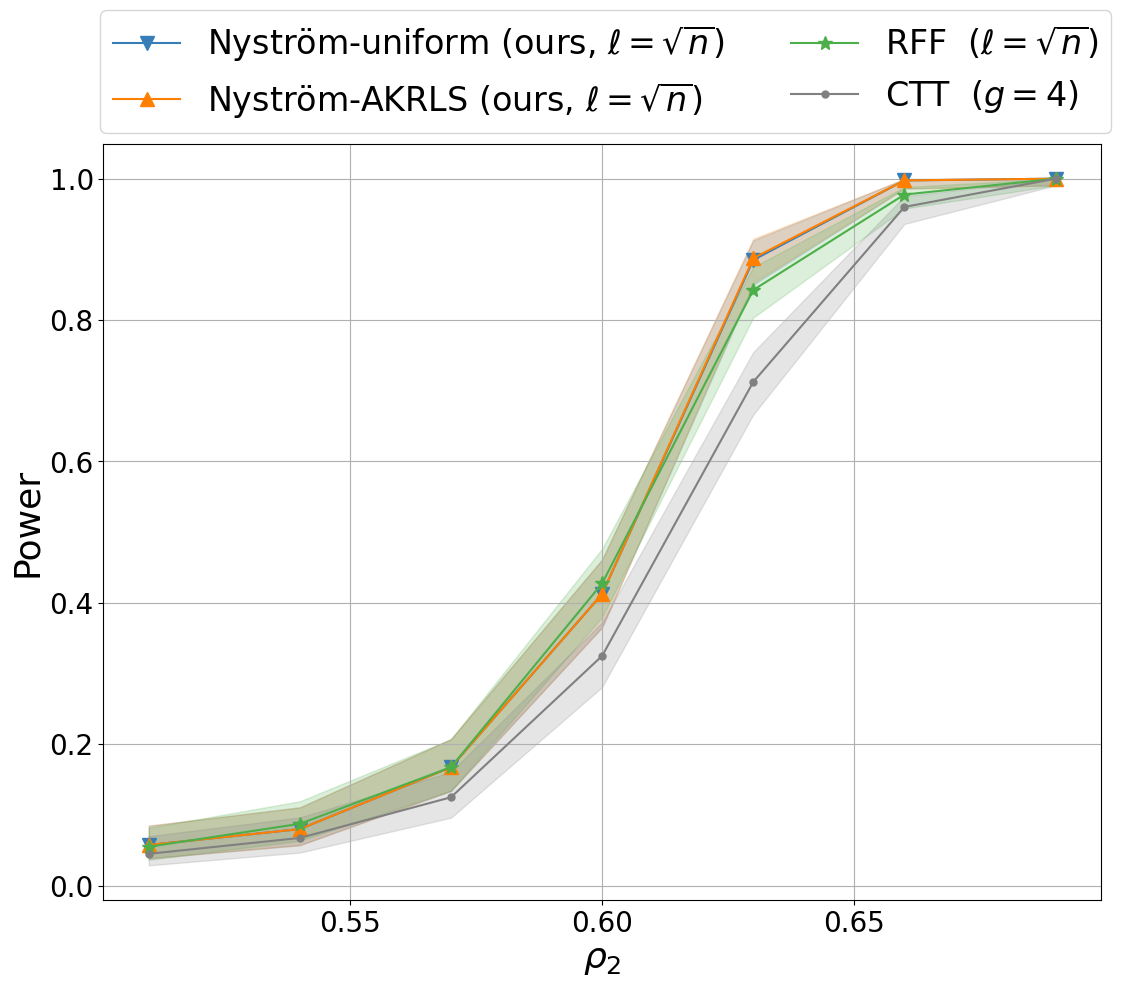

In [5]:
# nys_feat defines the number of Nyström features to use for the plot
# ctt_feat defines the compression level for CTT to use for the plot
plot_powervsvars(results, vars, config, nys_feat=4, ctt_feat=4, file=folder+'/'+'CG_powervsrho_exactv2.pdf', legend_loc='upper left')

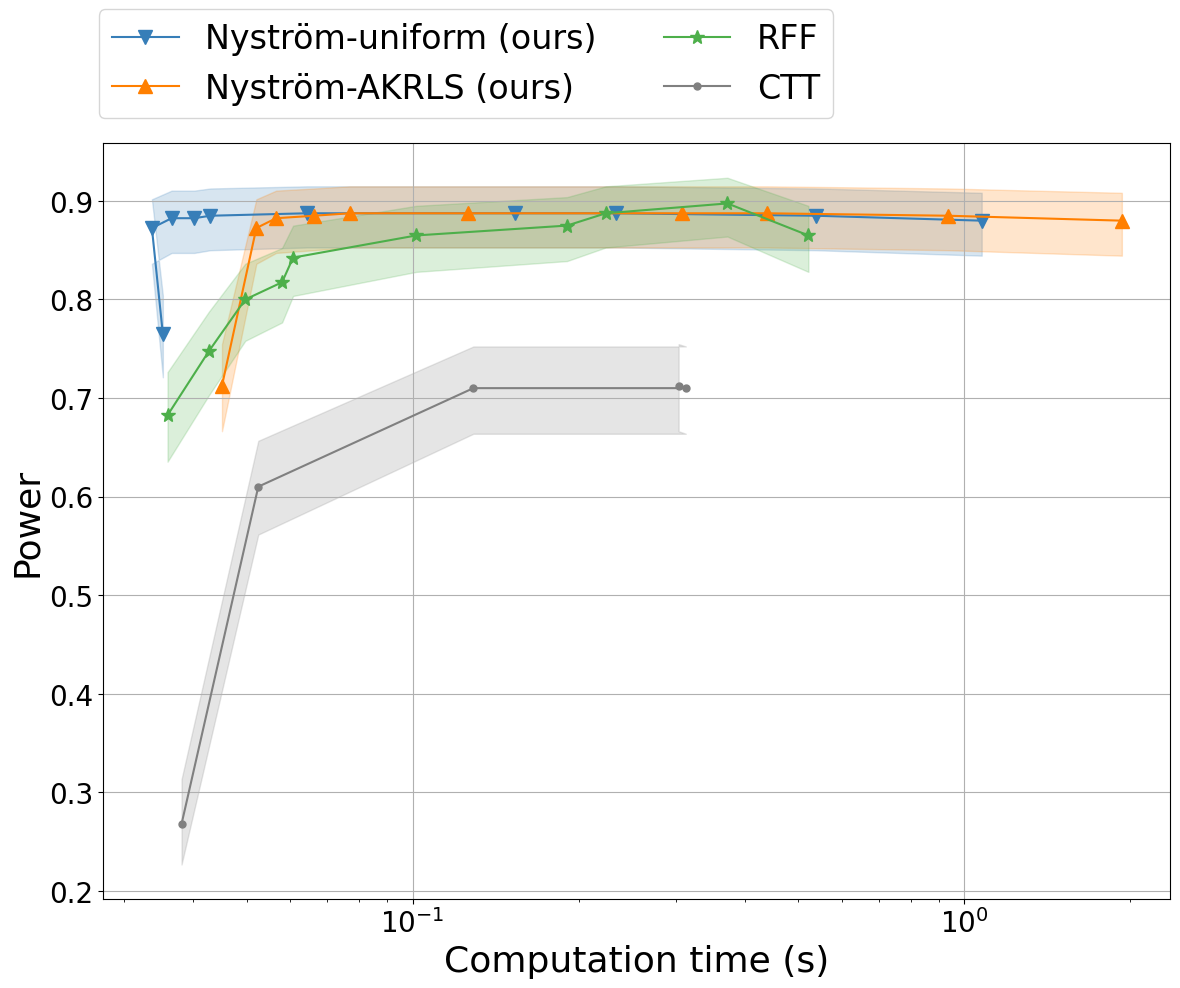

In [6]:
# the second argument defines which value of var to use for the plot
plot_powervscomp(results, 4, config, file=folder+'/'+'CG_powervstime.pdf', legend_loc='upper left', xlog=True)

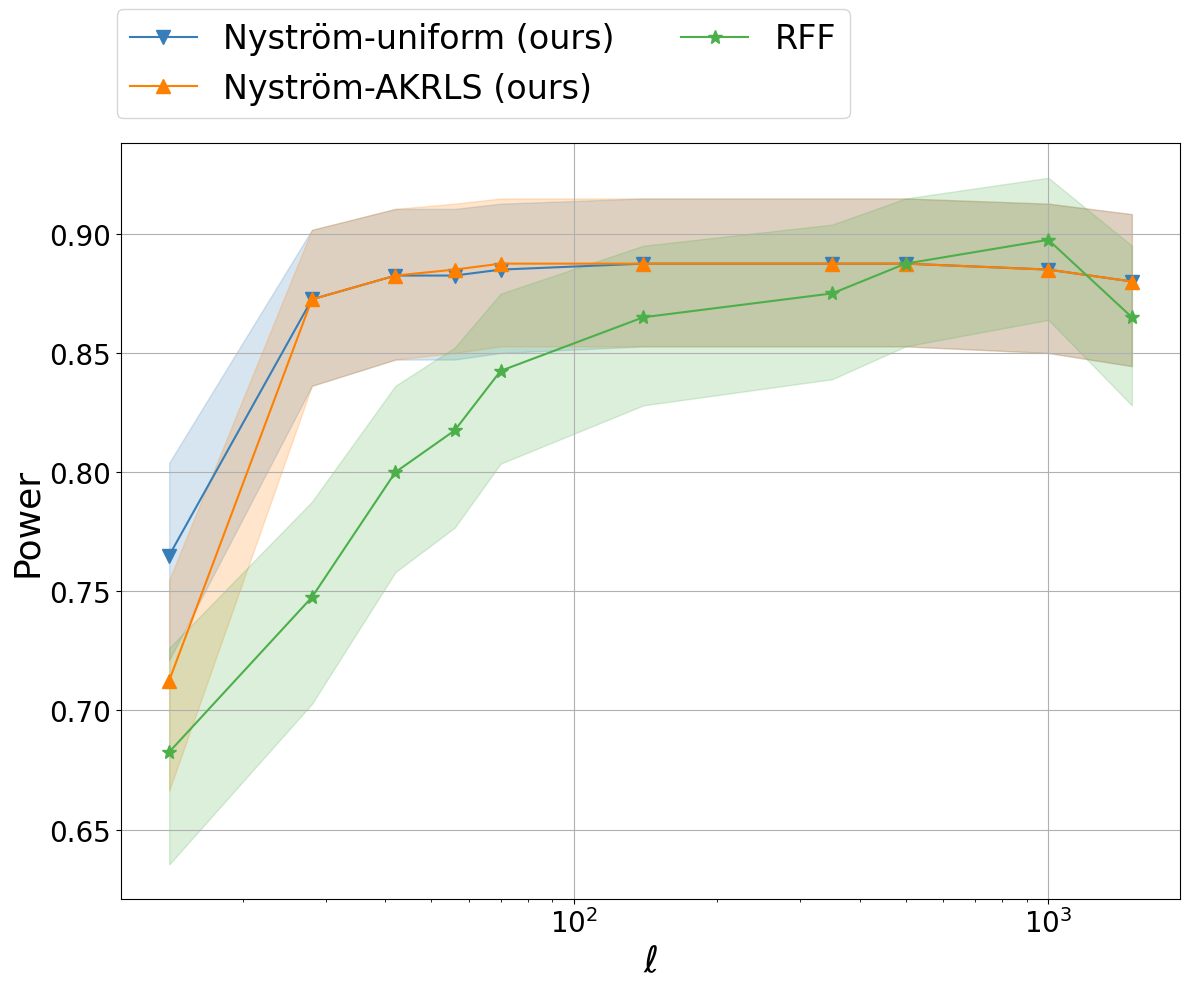

In [7]:
# the second argument defines which value of var to use for the plot
plot_powervsnfeat(results, 4, config, file=folder+'/'+'CG_powervsell.pdf', legend_loc = 'upper left')

### FPR

In [15]:
folder = 'paper/cg_ntot5000_B200_niter1000_rho0.5' # under the null hypothesis

config = {'dataset': 'cg', 'ntot': 5000, 'B': 200, 'niter': 1000}
methods = ['uniform', 'rlss', 'rff', 'ctt'] # do not include "fullrank here"

results = load_results(folder, methods=methods) 

powers = {}
for method in methods:
    if method=='ctt': n_feat=4
    else: n_feat=4
    powers[method] = np.asarray([power_interval(el, config['niter']) for el in results[method][:,1, n_feat]])

print(powers)

loading uniform
['paper/cg_ntot5000_B200_niter1000_rho0.5/var0.5/uniform/results.npy']
loading rlss
['paper/cg_ntot5000_B200_niter1000_rho0.5/var0.5/rlss/results.npy']
loading rff
['paper/cg_ntot5000_B200_niter1000_rho0.5/var0.5/rff/results.npy']
loading ctt
['paper/cg_ntot5000_B200_niter1000_rho0.5/var0.5/ctt/results.npy']
{'uniform': array([[0.044     , 0.03293821, 0.05855179]]), 'rlss': array([[0.044     , 0.03293821, 0.05855179]]), 'rff': array([[0.049     , 0.03726103, 0.0641907 ]]), 'ctt': array([[0.043     , 0.03207865, 0.057419  ]])}


### Fullrank

loading fullrank
['paper/cg_ntot5000_B200_niter400/var0.6/fullrank/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.69/fullrank/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.51/fullrank/results.npy']
loading uniform
['paper/cg_ntot5000_B200_niter400/var0.63/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.54/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.6/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.69/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.51/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.66/uniform/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.57/uniform/results.npy']
loading rlss
['paper/cg_ntot5000_B200_niter400/var0.63/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.54/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.6/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.69/rlss/results.npy', 'paper/cg_ntot5000_B200_niter400/var0.51/rlss/results.npy', 'paper/cg_ntot5000_B2

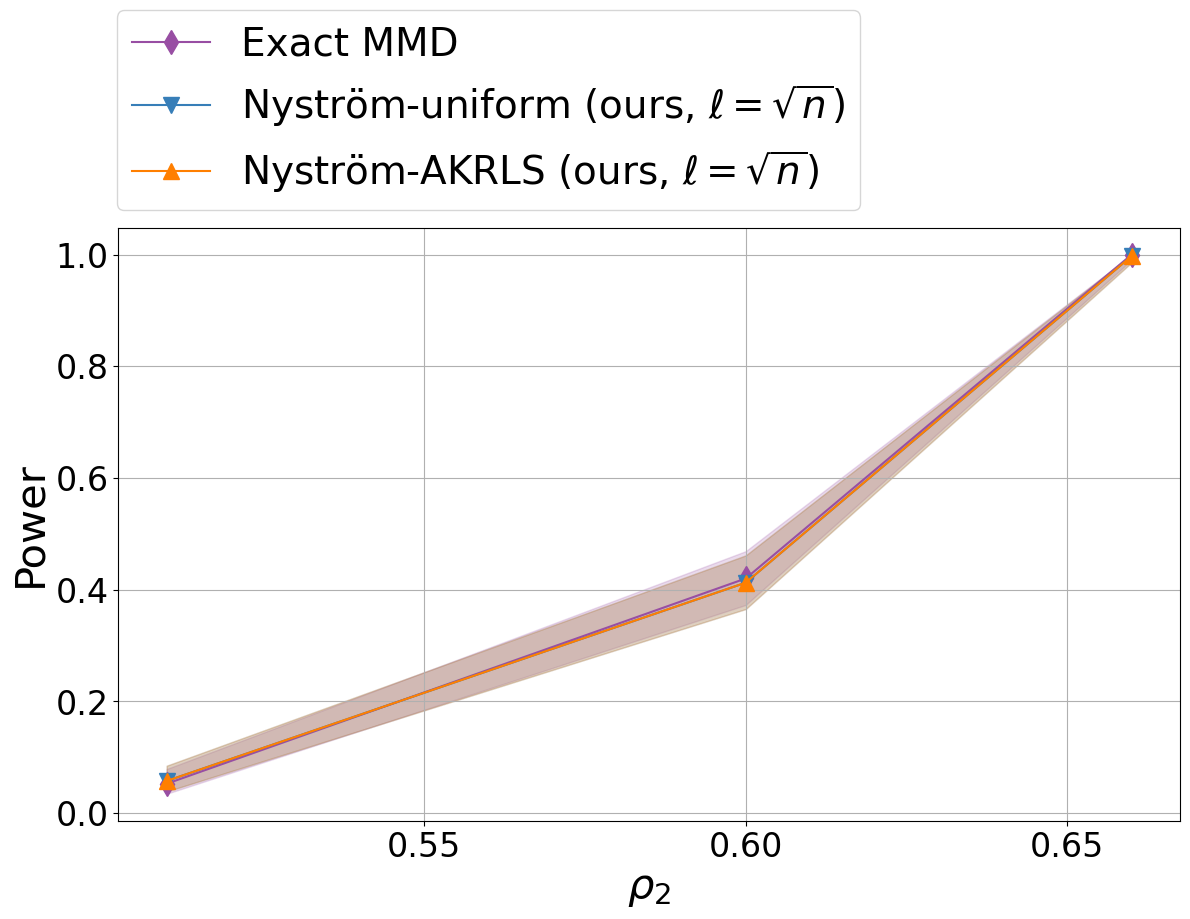

In [26]:
folder = 'paper/cg_ntot5000_B200_niter400'
results = load_results(folder, methods=['fullrank','uniform','rlss']) 

config = {'dataset': 'cg', 'ntot': 5000, 'B': 200, 'niter': 400}
vars = [0.51, 0.54, 0.57, 0.6, 0.63, 0.66, 0.69]

plot_powervsvars_exactv3(results, vars, config, nys_feat=4, ctt_feat=4, file=folder+'/'+'CG_powervsrho_exact3.pdf', legend_loc='upper left')

## Higgs

In [35]:
folder = 'paper/higgs_B200_niter400_mix0.2_reduced0'

In [36]:
config = {'dataset': 'higgs', 'B': 200, 'niter': 400}
vars = [1000, 5000, 10000, 20000, 40000, 60000, 80000, 100000]
methods = ['uniform', 'rlss', 'rff', 'ctt'] # do not include "fullrank here"

In [37]:
# do not include "fullrank here"
results = load_results(folder, methods=methods) 


loading uniform
['paper/higgs_B200_niter400_mix0.2_reduced0/var5000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var1000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var40000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var100000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var80000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var10000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var20000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var60000/uniform/results.npy']
loading rlss
['paper/higgs_B200_niter400_mix0.2_reduced0/var5000/rlss/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var1000/rlss/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var40000/rlss/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var100000/rlss/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var80000/rlss/results.npy', 'paper/higgs_B200_niter4

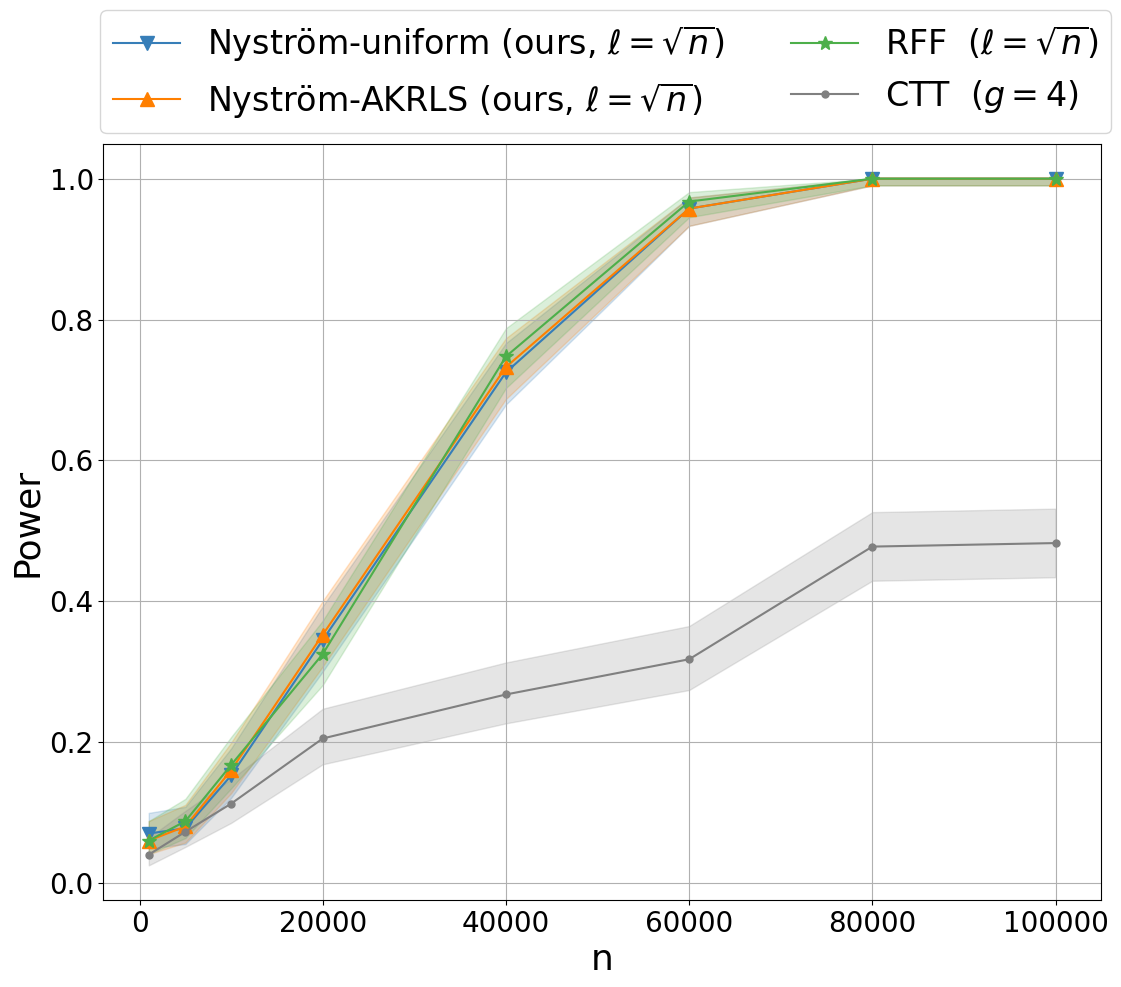

In [38]:
# nys_feat defines the number of Nyström features to use for the plot
# ctt_feat defines the compression level for CTT to use for the plot
plot_powervsvars(results, vars, config, nys_feat=4, ctt_feat=4, file=folder+'/'+'higgs_powervsn_exactv2.pdf', legend_loc = 'upper left')


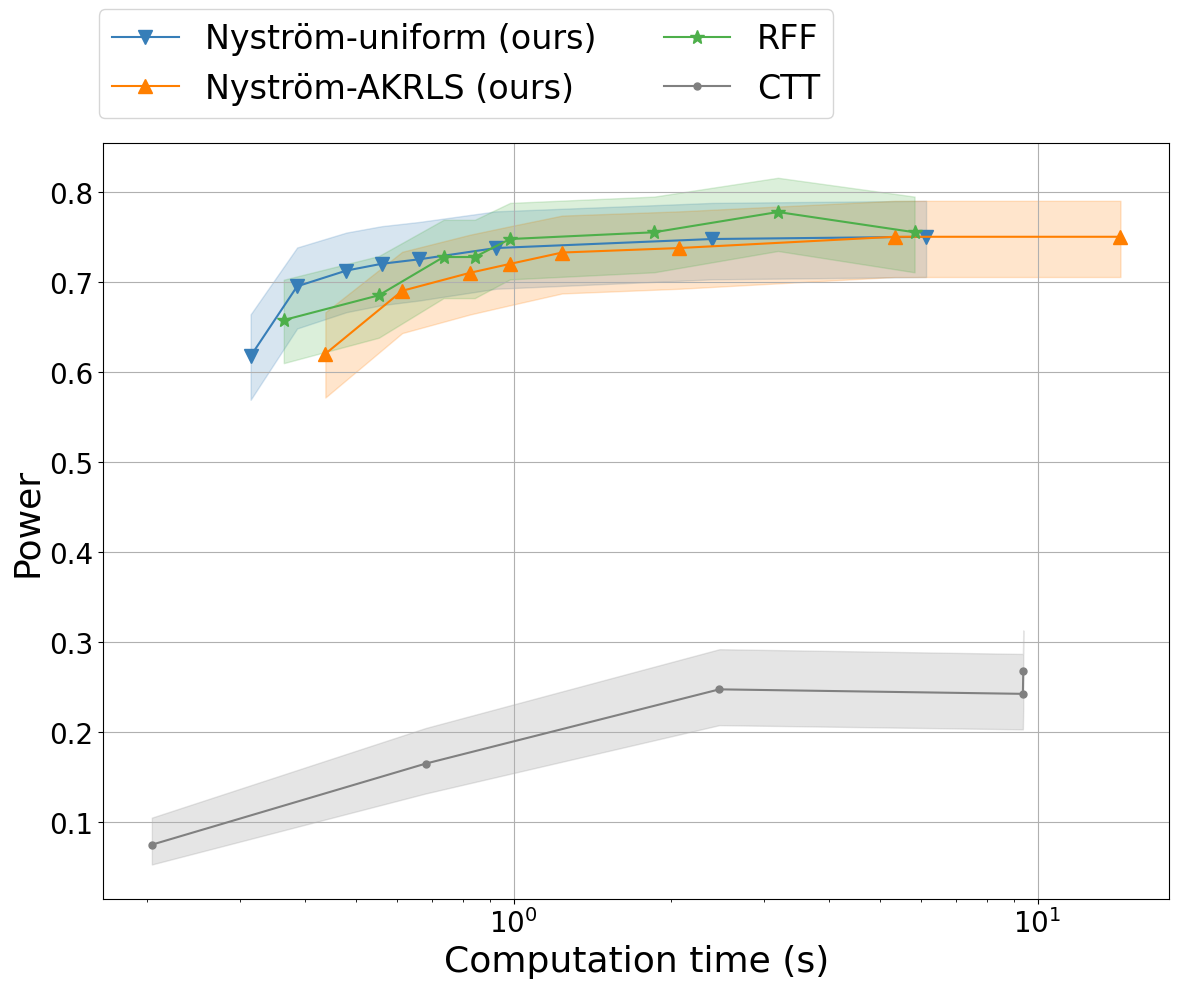

In [40]:
# the second argument defines which value of var to use for the plot
plot_powervscomp(results, 4, config, file=folder+'/'+'higgs_powervstime.pdf', legend_loc = 'upper left', xlog=True)


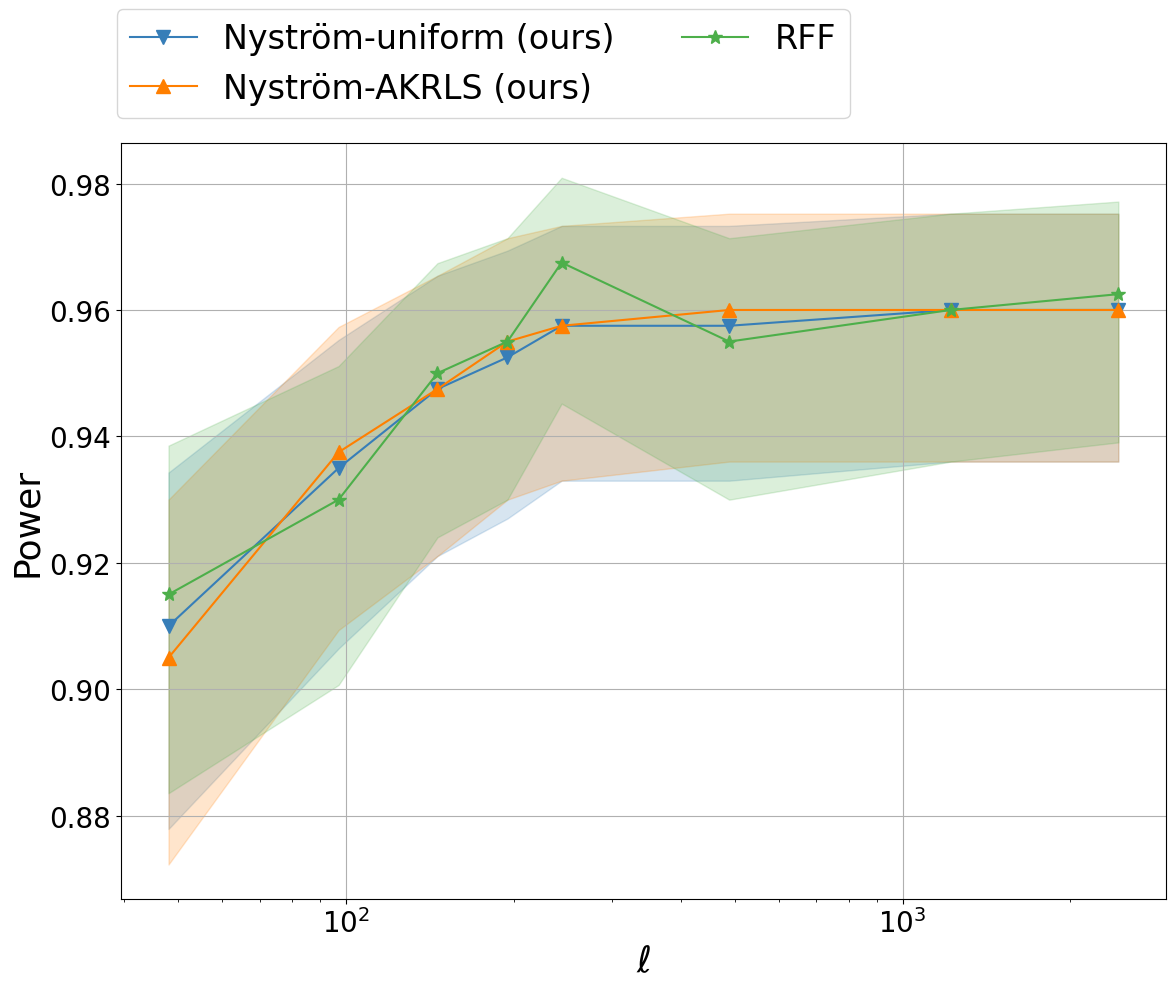

In [17]:
# the second argument defines which value of var to use for the plot
plot_powervsnfeat(results, 5, config, file=folder+'/'+'higgs_powervsell.pdf', legend_loc = 'upper left')


### FPR

loading uniform
['paper/higgs_B200_niter1000_mix0.0_reduced0/var5000/uniform/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var1000/uniform/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var40000/uniform/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var100000/uniform/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var80000/uniform/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var10000/uniform/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var20000/uniform/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var60000/uniform/results.npy']
loading rlss
['paper/higgs_B200_niter1000_mix0.0_reduced0/var5000/rlss/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var1000/rlss/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var40000/rlss/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var100000/rlss/results.npy', 'paper/higgs_B200_niter1000_mix0.0_reduced0/var80000/rlss/results.npy', 'paper/higg

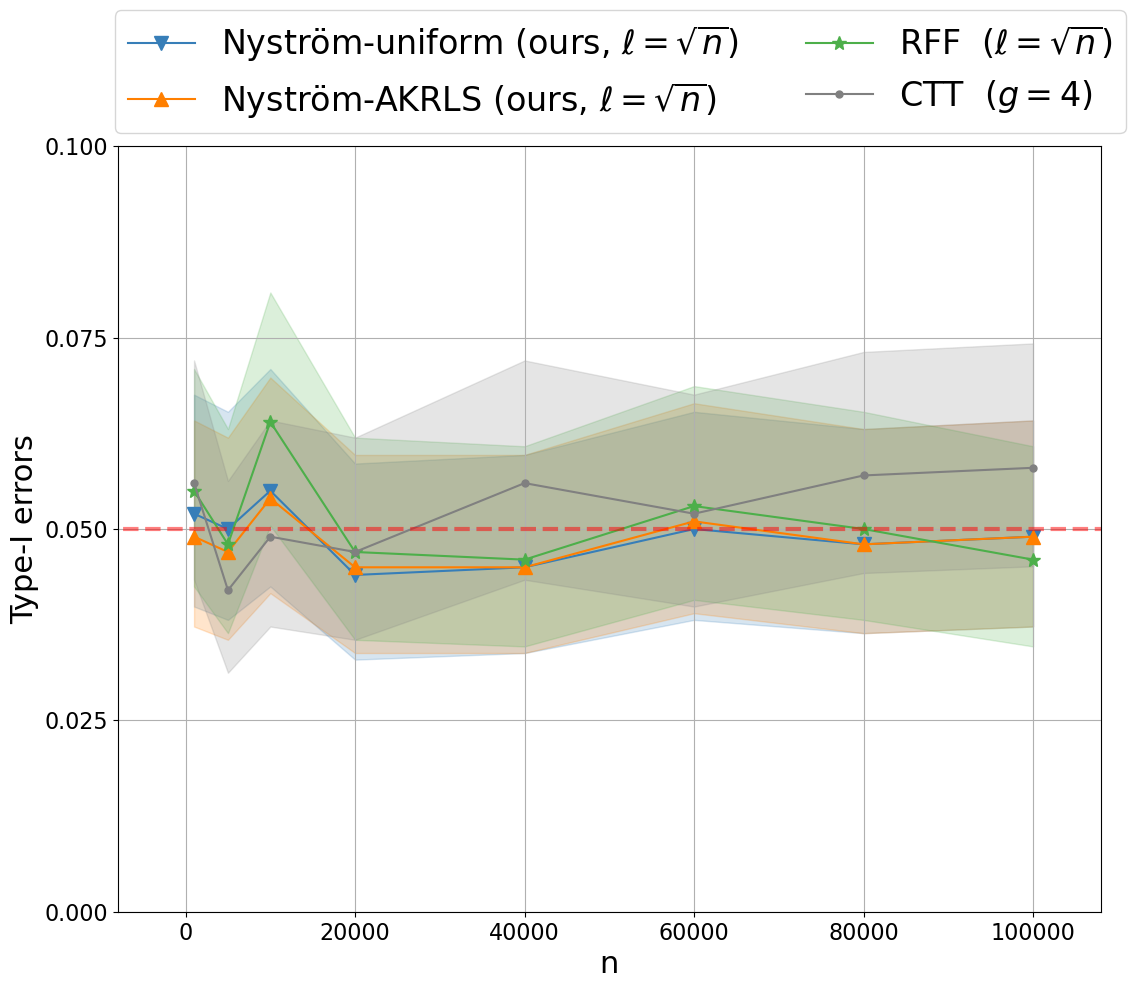

In [41]:
folder = 'paper/higgs_B200_niter1000_mix0.0_reduced0' # under the null hypothesis

config = {'dataset': 'higgs', 'B': 200, 'niter': 1000}
methods = ['uniform', 'rlss', 'rff', 'ctt'] # do not include "fullrank here"
vars = [1000, 5000, 10000, 20000, 40000, 60000, 80000, 100000]

results = load_results(folder, methods=methods) 

powers = {}

for method in methods:
    if method=='ctt': n_feat=4
    else: n_feat=4
    powers[method] = np.asarray([power_interval(el, config['niter']) for el in results[method][:,1, n_feat]])

plot_sizevsvars(results, vars, config, file=folder+'/'+'higgs_fpr.pdf', legend_loc='upper left', xlim=(-8000,108000))


### Fullrank

loading fullrank
['paper/higgs_B200_niter400_mix0.2_reduced0/var5000/fullrank/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var1000/fullrank/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var10000/fullrank/results.npy']
loading uniform
['paper/higgs_B200_niter400_mix0.2_reduced0/var5000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var1000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var40000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var100000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var80000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var10000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var20000/uniform/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var60000/uniform/results.npy']
loading rlss
['paper/higgs_B200_niter400_mix0.2_reduced0/var5000/rlss/results.npy', 'paper/higgs_B200_niter400_mix0.2_reduced0/var1000/rlss/results.npy

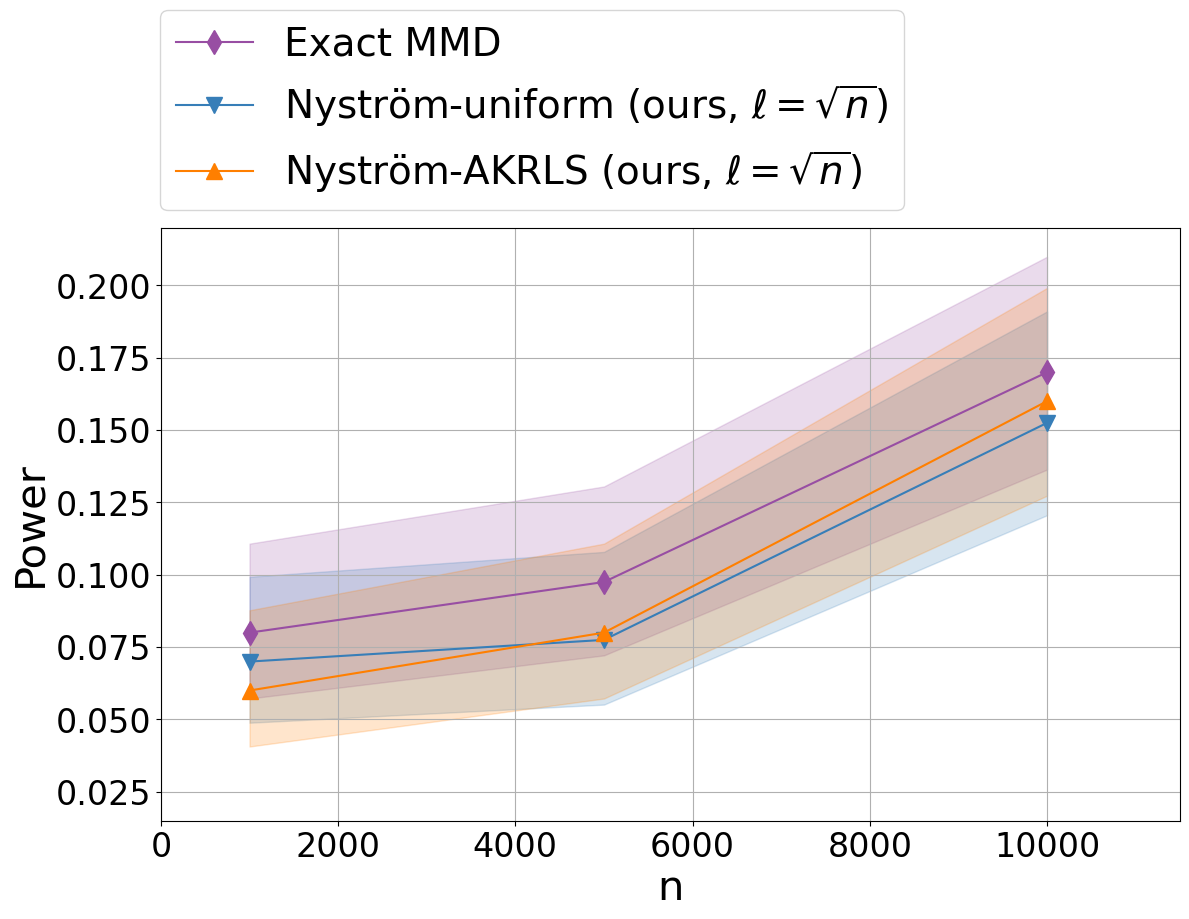

In [42]:
folder = 'paper/higgs_B200_niter400_mix0.2_reduced0'

config = {'dataset': 'higgs', 'B': 200, 'niter': 400}
vars = [1000, 5000, 10000, 20000, 40000, 60000, 80000, 100000]

results = load_results(folder, methods=['fullrank','uniform','rlss']) 

plot_powervsvars_exactv3(results, vars, config, nys_feat=4, ctt_feat=4, file=folder+'/'+'higgs_powervsn_exactv3.pdf', legend_loc = 'upper left', xlim=(0,11500), ylim=(0.015,0.22))


## Susy

In [43]:
folder = 'paper/susy_B200_niter400_mix0.05'

In [44]:
config = {'dataset': 'susy', 'B': 200, 'niter': 400}
vars = [2000, 4000, 8000, 16000, 24000, 32000, 40000, 80000]
methods = ['uniform', 'rlss', 'rff', 'ctt'] # do not include "fullrank here"

In [45]:
results = load_results(folder, methods=methods) 

loading uniform
['paper/susy_B200_niter400_mix0.05/var24000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var16000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var40000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var80000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var32000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var8000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var2000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var4000/uniform/results.npy']
loading rlss
['paper/susy_B200_niter400_mix0.05/var24000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var16000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var40000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var80000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var32000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var8000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var2000/rlss/results.npy', 'paper/susy_B200_nit

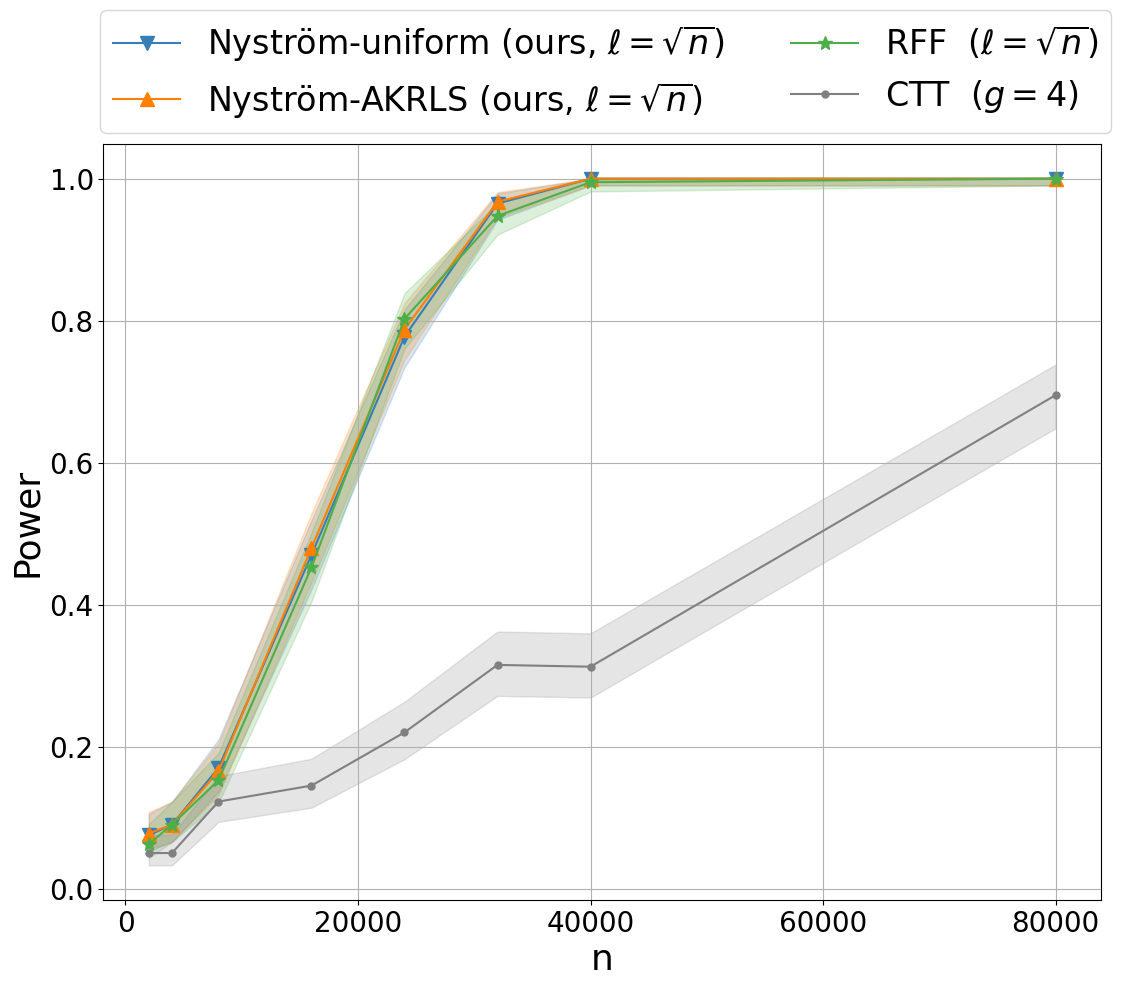

In [46]:
# nys_feat defines the number of Nyström features to use for the plot
# ctt_feat defines the compression level for CTT to use for the plot
plot_powervsvars(results, vars, config, file=folder+'/'+'susy_powervsn_exactv2.pdf', legend_loc = 'upper left', ctt_feat=4)


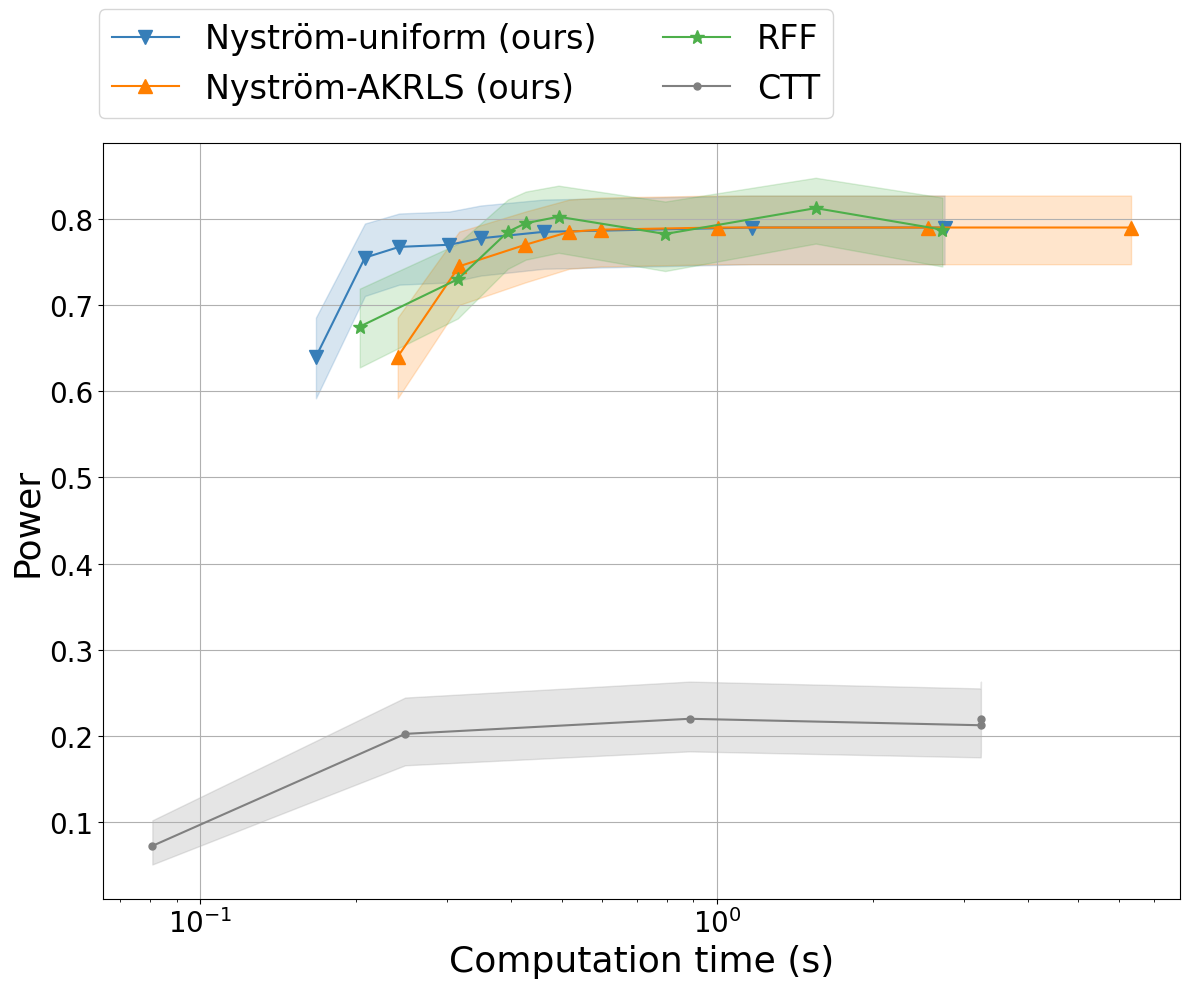

In [47]:
# the second argument defines which value of var to use for the plot
plot_powervscomp(results, 4, config, file=folder+'/'+'susy_powervstime.pdf', legend_loc='upper left')


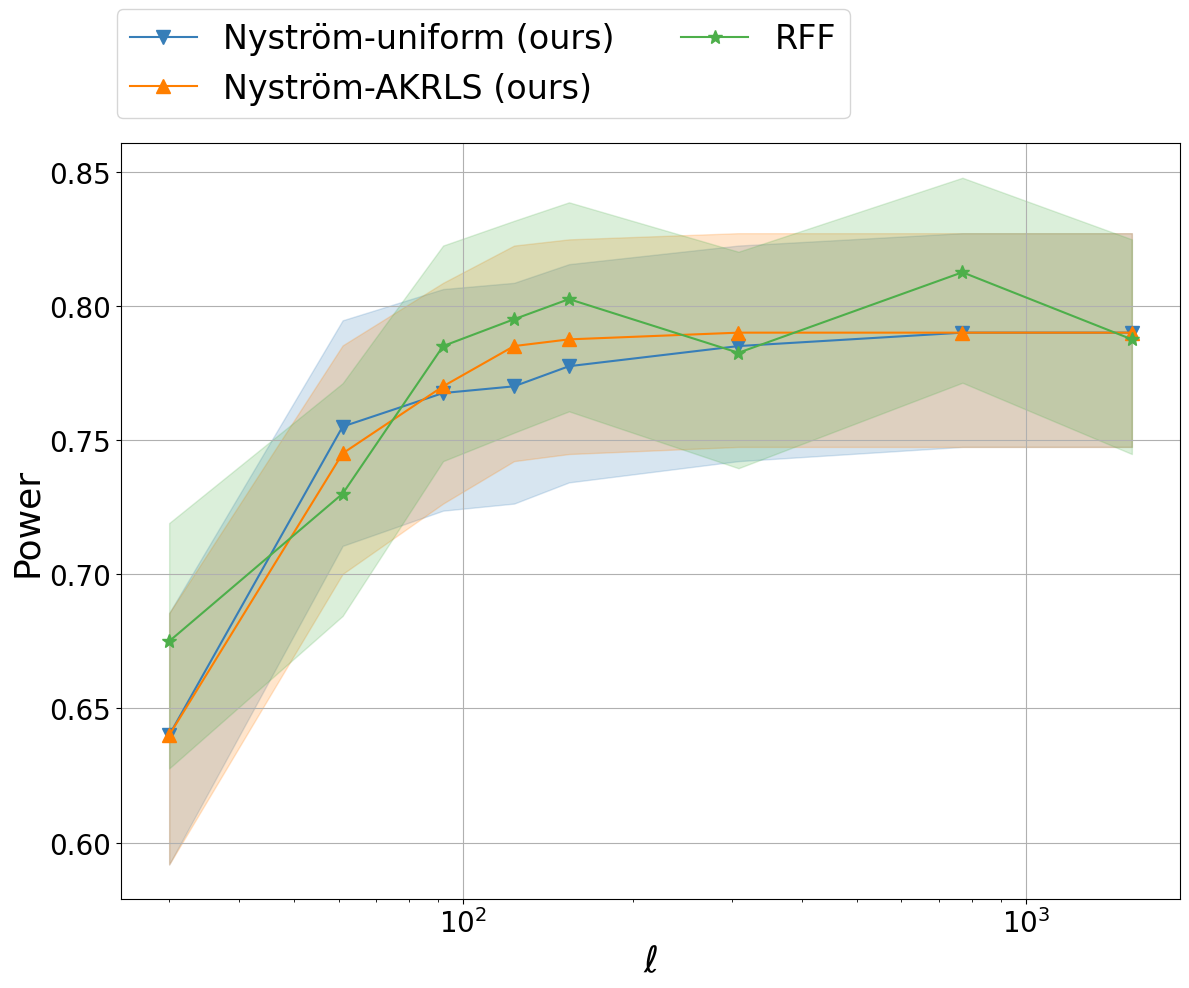

In [48]:
# the second argument defines which value of var to use for the plot
plot_powervsnfeat(results, 4, config, file=folder+'/'+'susy_powervsell.pdf')

### FPR

loading uniform
['paper/susy_B200_niter1000_mix0.0/var24000/uniform/results.npy', 'paper/susy_B200_niter1000_mix0.0/var16000/uniform/results.npy', 'paper/susy_B200_niter1000_mix0.0/var40000/uniform/results.npy', 'paper/susy_B200_niter1000_mix0.0/var80000/uniform/results.npy', 'paper/susy_B200_niter1000_mix0.0/var32000/uniform/results.npy', 'paper/susy_B200_niter1000_mix0.0/var8000/uniform/results.npy', 'paper/susy_B200_niter1000_mix0.0/var2000/uniform/results.npy', 'paper/susy_B200_niter1000_mix0.0/var4000/uniform/results.npy']
loading rlss
['paper/susy_B200_niter1000_mix0.0/var24000/rlss/results.npy', 'paper/susy_B200_niter1000_mix0.0/var16000/rlss/results.npy', 'paper/susy_B200_niter1000_mix0.0/var40000/rlss/results.npy', 'paper/susy_B200_niter1000_mix0.0/var80000/rlss/results.npy', 'paper/susy_B200_niter1000_mix0.0/var32000/rlss/results.npy', 'paper/susy_B200_niter1000_mix0.0/var8000/rlss/results.npy', 'paper/susy_B200_niter1000_mix0.0/var2000/rlss/results.npy', 'paper/susy_B200_nit

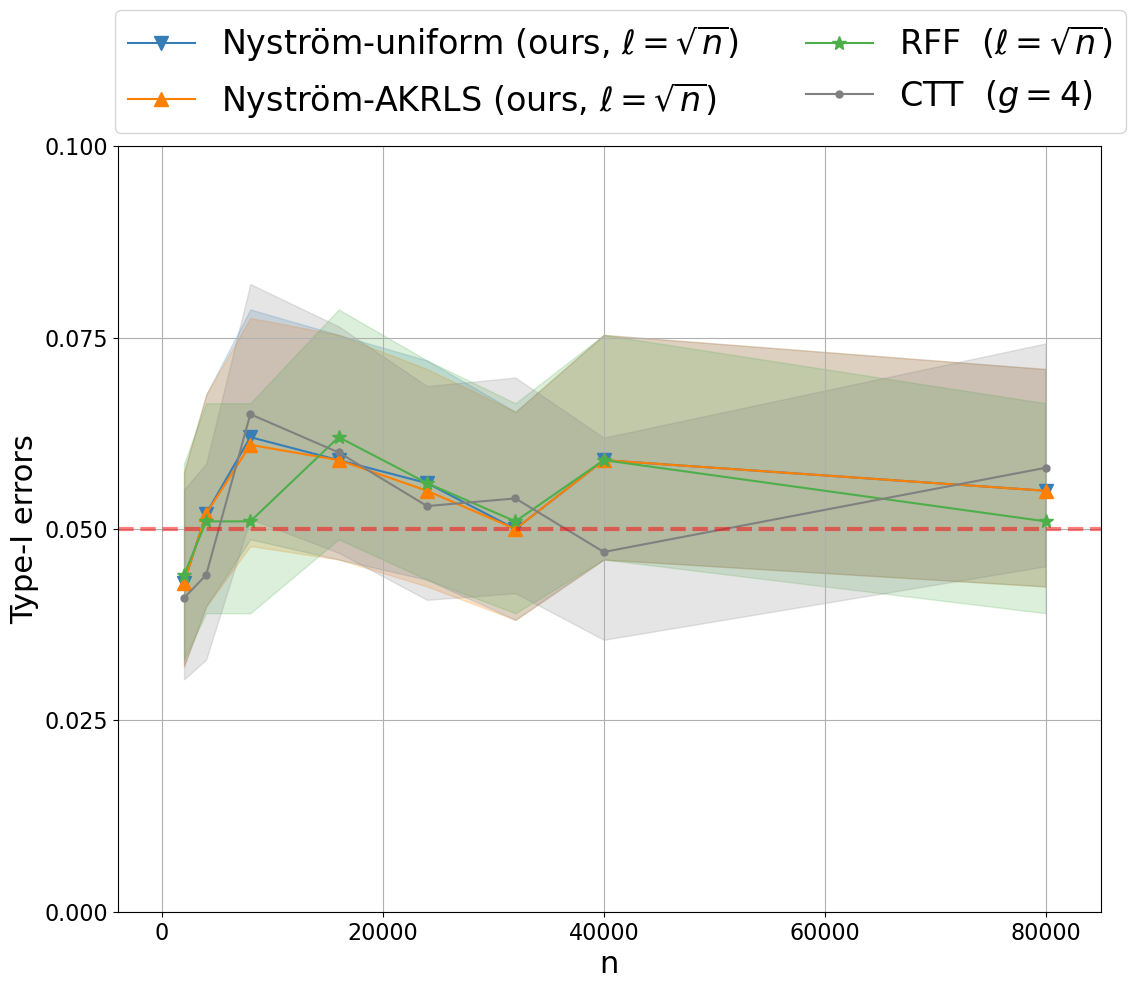

In [49]:
folder = 'paper/susy_B200_niter1000_mix0.0' # under the null hypothesis

config = {'dataset': 'susy', 'B': 200, 'niter': 1000}
methods = ['uniform', 'rlss', 'rff', 'ctt'] # do not include "fullrank here"
vars = [2000, 4000, 8000, 16000, 24000, 32000, 40000, 80000]

results = load_results(folder, methods=methods) 

powers = {}

for method in methods:
    if method=='ctt': n_feat=4
    else: n_feat=4
    powers[method] = np.asarray([power_interval(el, config['niter']) for el in results[method][:,1, n_feat]])

plot_sizevsvars(results, vars, config, file=folder+'/'+'higgs_fpr.pdf', legend_loc='upper left', xlim=(-4000,85000))


### Fullrank

loading fullrank
['paper/susy_B200_niter400_mix0.05/var8000/fullrank/results.npy', 'paper/susy_B200_niter400_mix0.05/var2000/fullrank/results.npy', 'paper/susy_B200_niter400_mix0.05/var4000/fullrank/results.npy']
loading uniform
['paper/susy_B200_niter400_mix0.05/var24000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var16000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var40000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var80000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var32000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var8000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var2000/uniform/results.npy', 'paper/susy_B200_niter400_mix0.05/var4000/uniform/results.npy']
loading rlss
['paper/susy_B200_niter400_mix0.05/var24000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var16000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var40000/rlss/results.npy', 'paper/susy_B200_niter400_mix0.05/var80000/rlss/resul

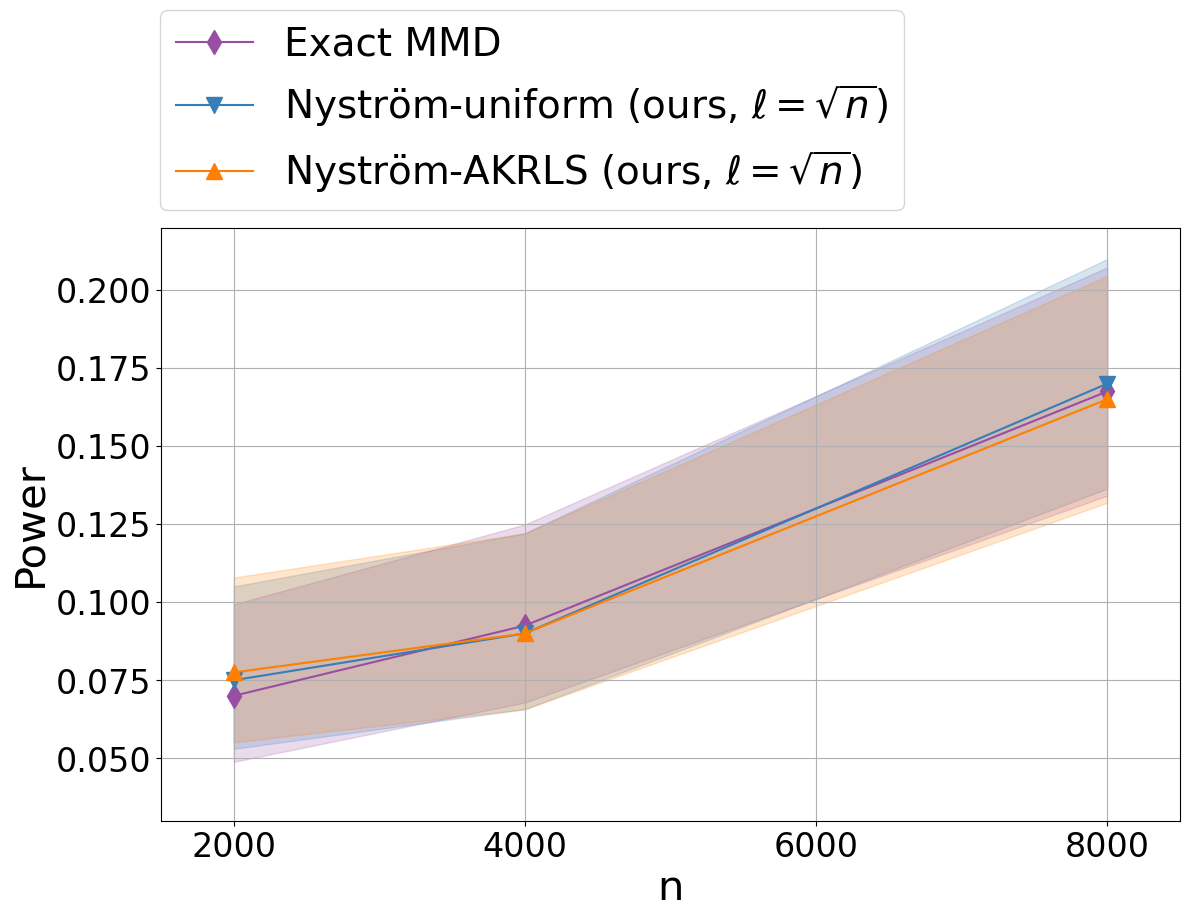

In [50]:
folder = 'paper/susy_B200_niter400_mix0.05'
config = {'dataset': 'susy', 'B': 200, 'niter': 400}
vars = [2000, 4000, 8000, 16000, 24000, 32000, 40000, 80000]

results = load_results(folder, methods=['fullrank','uniform', 'rlss']) 

plot_powervsvars_exactv3(results, vars, config, file=folder+'/'+'susy_powervsn_exactv3.pdf', legend_loc = 'upper left', ctt_feat=4, xlim=(1500,8500), ylim=(0.03,0.22))
